In [1]:
# 기본
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 경고 뜨지 않게...
import warnings
warnings.filterwarnings('ignore')

# 그래프 설정
# plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = 20, 10
plt.rcParams['axes.unicode_minus'] = False

# 시간 관리를 위한 라이브러리
import datetime

# 데이터 수집
from pandas_datareader import data
import requests
from bs4 import BeautifulSoup
import re
import time
import os
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import Select

# 화면 청소
from IPython.display import clear_output

# 데이터 전처리 알고리즘
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

# 학습용과 검증용으로 나누는 함수
from sklearn.model_selection import train_test_split

# 교차검증
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

# 하이퍼 파라미터 튜닝
from sklearn.model_selection import GridSearchCV

# 분류 알고리즘
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

# 회귀 알고리즘
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import VotingRegressor

# 분류용 평가 함수
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# 회귀용 평가 함수
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# 차원 축소
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# 군집
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift

# 시계열 분석
from pmdarima.arima import auto_arima
from fbprophet import Prophet

# 형태소 분석도구
from soynlp.utils import DoublespaceLineCorpus
from soynlp.noun import LRNounExtractor_v2
from soynlp.noun import LRNounExtractor
from soynlp.noun import NewsNounExtractor

from konlpy.tag import Okt, Hannanum, Kkma, Mecab, Komoran

# 형태소 벡터를 생성하기 위한 라이브러리
from sklearn.feature_extraction.text import CountVectorizer
# 형태소 벡터를 학습 벡터로 변한하는 라이브러리
from sklearn.feature_extraction.text import TfidfTransformer


# 워드 클라우드
from collections import Counter
import pytagcloud
from IPython.display import Image

# 상관관계
from patsy import dmatrices
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 추천
from surprise import SVD, Dataset, Reader, accuracy
from surprise.model_selection import train_test_split

pygame 2.1.2 (SDL 2.0.18, Python 3.8.12)
Hello from the pygame community. https://www.pygame.org/contribute.html


 ### 데이터를 읽어온다.

In [2]:
df = pd.read_csv('data/review_data.csv')
df

,score,review,y
0,5,친절하시고 깔끔하고 좋았습니다,1
1,5,조용하고 고기도 굿,1
2,4,"갈비탕과 냉면, 육회비빔밥이 맛있습니다.",1
3,4,대체적으로 만족하나\n와인의 구성이 살짝 아쉬움,1
4,5,고기도 맛있고 서비스는 더 최고입니다~,1
...,...,...,...
540,3,추웟어요 고기 외에는 별로에요..,0
541,1,고기질과 육전은 좋다.다만 한우손님 돼지고기 손님을 차별한다(돼지손님은 주차불가.네...,0
542,5,직접 구워주시고 진짜맛있음. 반찬도 맛있음. 직원분이 친절하게 잘해주시네요,1
543,4,친절하게 서빙해주시고 음식도 챙겨주셨어요 ㅎ,1


### 한글 외의 모든 글자를 제거한다.

In [3]:
def text_clearning(text) :
    # 한글 정규식
    hangul = re.compile('[^ ㄱ-ㅣ가-힣]+')
    # 지정한 정규식에 해당하지 않는 것을 길이가 0인 문자열로 변경한다.
    result = hangul.sub('', text)
    return result

In [4]:
# 리뷰 내용을 정제한다.
df['ko_review'] = df['review'].apply(lambda x : text_clearning(x))
# review 컬럼은 제거한다.
df.drop('review', inplace=True, axis=1)
df

,score,y,ko_review
0,5,1,친절하시고 깔끔하고 좋았습니다
1,5,1,조용하고 고기도 굿
2,4,1,갈비탕과 냉면 육회비빔밥이 맛있습니다
3,4,1,대체적으로 만족하나와인의 구성이 살짝 아쉬움
4,5,1,고기도 맛있고 서비스는 더 최고입니다
...,...,...,...
540,3,0,추웟어요 고기 외에는 별로에요
541,1,0,고기질과 육전은 좋다다만 한우손님 돼지고기 손님을 차별한다돼지손님은 주차불가네이버예...
542,5,1,직접 구워주시고 진짜맛있음 반찬도 맛있음 직원분이 친절하게 잘해주시네요
543,4,1,친절하게 서빙해주시고 음식도 챙겨주셨어요 ㅎ


### 형태소 분석

In [5]:
# 불용어
stopwords = []

with open('data/korean_stopwords.txt', 'rt', encoding='utf-8') as fp :
    a1 = fp.readlines()
    
for a2 in a1 :
    stopwords.append(a2.strip())
    
stopwords

['아',
 '휴',
 '아이구',
 '아이쿠',
 '아이고',
 '어',
 '나',
 '우리',
 '저희',
 '따라',
 '의해',
 '을',
 '를',
 '에',
 '의',
 '가',
 '으로',
 '로',
 '에게',
 '뿐이다',
 '의거하여',
 '근거하여',
 '입각하여',
 '기준으로',
 '예하면',
 '예를 들면',
 '예를 들자면',
 '저',
 '소인',
 '소생',
 '저희',
 '지말고',
 '하지마',
 '하지마라',
 '다른',
 '물론',
 '또한',
 '그리고',
 '비길수 없다',
 '해서는 안된다',
 '뿐만 아니라',
 '만이 아니다',
 '만은 아니다',
 '막론하고',
 '관계없이',
 '그치지 않다',
 '그러나',
 '그런데',
 '하지만',
 '든간에',
 '논하지 않다',
 '따지지 않다',
 '설사',
 '비록',
 '더라도',
 '아니면',
 '만 못하다',
 '하는 편이 낫다',
 '불문하고',
 '향하여',
 '향해서',
 '향하다',
 '쪽으로',
 '틈타',
 '이용하여',
 '타다',
 '오르다',
 '제외하고',
 '이 외에',
 '이 밖에',
 '하여야',
 '비로소',
 '한다면 몰라도',
 '외에도',
 '이곳',
 '여기',
 '부터',
 '기점으로',
 '따라서',
 '할 생각이다',
 '하려고하다',
 '이리하여',
 '그리하여',
 '그렇게 함으로써',
 '하지만',
 '일때',
 '할때',
 '앞에서',
 '중에서',
 '보는데서',
 '으로써',
 '로써',
 '까지',
 '해야한다',
 '일것이다',
 '반드시',
 '할줄알다',
 '할수있다',
 '할수있어',
 '임에 틀림없다',
 '한다면',
 '등',
 '등등',
 '제',
 '겨우',
 '단지',
 '다만',
 '할뿐',
 '딩동',
 '댕그',
 '대해서',
 '대하여',
 '대하면',
 '훨씬',
 '얼마나',
 '얼마만큼',
 '얼마큼',
 '남짓',
 '여',
 '얼마간',
 '약간',
 '다소',
 '좀',
 '조

In [6]:
def get_pos(x) :
    # tagger = Hannanum()
    tagger = Okt()
    pos = tagger.pos(x)
    
    # 단어의 품사를 합쳐서 하나의 단어로 만들어준다.
    result = []
    
    # 행태소의 수만큼 반복한다.
    for a1 in pos : 
        # 불용어에 해당하지 않는 것만 담는다.
        if a1[0] not in stopwords :
            result.append(f'{a1[0]}/{a1[1]}')
        
    return result

In [7]:
get_pos('동해물과 백두산이 마르고 닳도록')

['동/Modifier', '해물/Noun', '백두산/Noun', '마르고/Noun', '닳도록/Verb']

### 형태소 벡터 생성

In [8]:
index_vectorizer = CountVectorizer(tokenizer=lambda x : get_pos(x))
X = index_vectorizer.fit_transform(df['ko_review'].tolist())
X

<545x2884 sparse matrix of type '<class 'numpy.int64'>'
	with 8266 stored elements in Compressed Sparse Row format>

In [9]:
print(df['ko_review'][0])
print(X[0])

친절하시고 깔끔하고 좋았습니다
  (0, 2514)	1
  (0, 407)	1
  (0, 2274)	1


### 위에서 만든 형태소 벡터를 TF-IDF 벡터로 생성한다.

In [10]:
tfidf_vectorizer = TfidfTransformer()
X = tfidf_vectorizer.fit_transform(X)
print(X[0])

  (0, 2514)	0.5548708693511647
  (0, 2274)	0.48955631270748484
  (0, 407)	0.6726462183300624


In [11]:
y = df['y']
y

0      1
1      1
2      1
3      1
4      1
      ..
540    0
541    0
542    1
543    1
544    1
Name: y, Length: 545, dtype: int64

### 기본 모델을 통한 교차 검증

In [12]:
kfold = KFold(n_splits=10, shuffle=True, random_state=1)

In [13]:
# 검증할 모델들 생성
model1 = KNeighborsClassifier()
model2 = LogisticRegression(random_state=1)
model3 = SVC(random_state=1, probability=True)
model4 = DecisionTreeClassifier(random_state=1)
model5 = RandomForestClassifier(random_state=1)
model6 = AdaBoostClassifier(random_state=1)
model7 = GradientBoostingClassifier(random_state=1)
model8 = LGBMClassifier(random_state=1)
model9 = XGBClassifier(random_state=1, silent=True, verbosity=0)

model_list = [model1, model2, model3, model4, model5, model6, 
              model7, model8, model9]

In [14]:
# 모델 이름 목록
model_name = ['KNN', 'LR', 'SVM', 'DT', 'RF', 'Ada', 'GB', 'LGBM', 'XGB']

In [15]:
# 결과를 담을 리스트
result_list = []
result_name = []

In [16]:
# 모델의 수 만큼 반복하면서 교차 검증을 수행한다.
for idx, m1 in enumerate(model_list) :
    r1 = cross_val_score(m1, X, y, scoring='f1', cv=kfold)
    print(f'{model_name[idx]} 평균 성능 수치 : {r1.mean()}')
    
    # 검증 결과를 리스트에 담는다.
    result_list.append(r1.mean())
    result_name.append(f'{model_name[idx]} Basic')

KNN 평균 성능 수치 : 0.9506513092411069
LR 평균 성능 수치 : 0.9479277809113741
SVM 평균 성능 수치 : 0.9479277809113741
DT 평균 성능 수치 : 0.9392687266594125
RF 평균 성능 수치 : 0.9479277809113741
Ada 평균 성능 수치 : 0.9454067153482718
GB 평균 성능 수치 : 0.9451599963965217
LGBM 평균 성능 수치 : 0.9407198549757055
XGB 평균 성능 수치 : 0.9371335882041771


### 하이퍼 파라미터 튜닝

In [17]:
# 각 모델별 하이퍼 파라미터
params = [
    # KNN
    {
        'n_neighbors' : list(range(1, 21))
    },
    # LogisticRegression
    {
        'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
        'C' : [0.0001, 0.001, 0.01, 0.1, 0, 1, 10, 100, 1000]
    },
    # SVM
    {
        'C' : [0.0001, 0.001, 0.01, 0.1, 0, 1, 10, 100, 1000]
    },
    # DecisionTree
    {
        'max_depth' : [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
    },
    # RandomForest
    {
        'n_estimators' : [50, 100, 150, 200, 250, 300]
    },
    # AdaBoost
    {
        'n_estimators' : [50, 100, 150, 200, 250, 300],
        'learning_rate' : [0.0001, 0.001, 0.01, 0.1, 0, 1, 10, 100, 1000, 10000]
    },
    # GradientBoost
    {
        'n_estimators' : [50, 100, 150, 200, 250, 300],
        'learning_rate' : [0.0001, 0.001, 0.01, 0.1, 0, 1, 10, 100, 1000, 10000]
    },
    # LGBM
    {
        'n_estimators' : [50, 100, 150, 200, 250, 300],
        'learning_rate' : [0.0001, 0.001, 0.01, 0.1, 0, 1, 10, 100, 1000, 10000]
    },
    # XGBoost
    {
        'n_estimators' : [50, 100, 150, 200, 250, 300],
        'learning_rate' : [0.0001, 0.001, 0.01, 0.1, 0, 1, 10, 100, 1000, 10000],
        'booster' : ['gbtree', 'gblinear']
    }
]

In [18]:
# 튜닝된 모델을 담을 리스트
tuning_model = []

In [19]:
for idx, m1 in enumerate(model_list) :
    grid = GridSearchCV(m1, param_grid=params[idx], scoring='f1', cv=kfold)
    grid.fit(X, y)
    print(f'{model_name[idx]}')
    print(f'최적의 하이퍼 파라미터 : {grid.best_params_}')
    print(f'최적의 모델 평균 성능 : {grid.best_score_}')
    print('----------------------------------------------')
    
    result_list.append(grid.best_score_)
    result_name.append(f'{model_name[idx]} Tuning')
    tuning_model.append(grid.best_estimator_)

KNN
최적의 하이퍼 파라미터 : {'n_neighbors': 6}
최적의 모델 평균 성능 : 0.9524365034392108
----------------------------------------------
LR
최적의 하이퍼 파라미터 : {'C': 0.0001, 'penalty': 'none'}
최적의 모델 평균 성능 : 0.9524592269748118
----------------------------------------------
SVM
최적의 하이퍼 파라미터 : {'C': 0.0001}
최적의 모델 평균 성능 : 0.9479277809113741
----------------------------------------------
DT
최적의 하이퍼 파라미터 : {'max_depth': 1}
최적의 모델 평균 성능 : 0.9479277809113741
----------------------------------------------
RF
최적의 하이퍼 파라미터 : {'n_estimators': 50}
최적의 모델 평균 성능 : 0.9479277809113741
----------------------------------------------
Ada
최적의 하이퍼 파라미터 : {'learning_rate': 0.1, 'n_estimators': 300}
최적의 모델 평균 성능 : 0.9527570532033238
----------------------------------------------
GB
최적의 하이퍼 파라미터 : {'learning_rate': 0.01, 'n_estimators': 100}
최적의 모델 평균 성능 : 0.9505979286507966
----------------------------------------------
LGBM
최적의 하이퍼 파라미터 : {'learning_rate': 0.01, 'n_estimators': 200}
최적의 모델 평균 성능 : 0.9484215061446845
------------

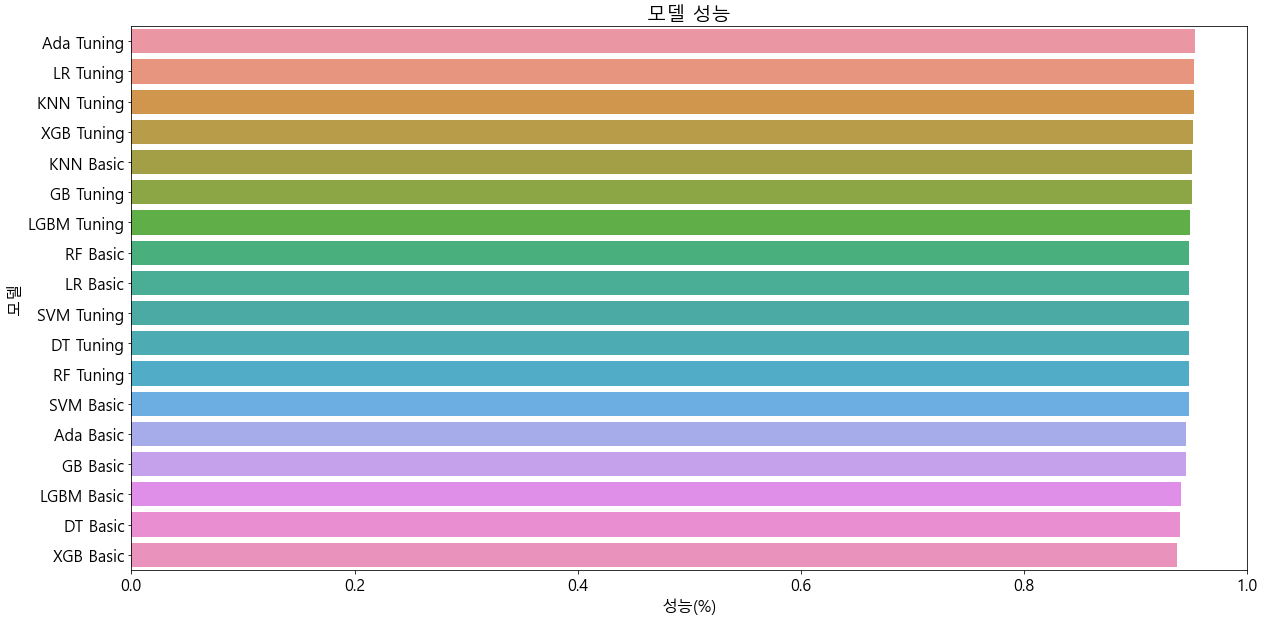

In [20]:
dict1 = {
    'Model' : result_name,
    'Score' : result_list
}

results_df = pd.DataFrame(dict1)

results_df.sort_values('Score', ascending=False, inplace=True)

results_df.reset_index(drop=True, inplace=True)

sns.barplot(data=results_df, x='Score', y='Model')
plt.title('모델 성능')
plt.xlabel('성능(%)')
plt.ylabel('모델')
plt.xlim(0, 1)
plt.show()

### 중요 단어 파악(중요 피처 파악)

In [21]:
model = tuning_model[1]

# 학습시 사용한 모든 컬럼과 결과 데이터의 상관 계수이다.
# 컬럼의 개수만큼 마오며 값이 클수록 1과 상관관계가 높고 
# 값이 작을 수록 0과 상관관계가 높다.
a1 = model.coef_[0]
a1

array([ 1.93778611,  4.44986066,  4.74130396, ...,  0.57228681,
       -8.70450894,  1.11728035])

In [22]:
a3 = []

for idx, value in enumerate(a1) :
    # print(idx)
    # print(value)
    # print('-------------------')
    
    a3.append((value, idx))
    
# 상관계수(첫 번재 값)을 기주으로 정렬한다.
coef_pos_index = sorted(a3, reverse=True)
coef_pos_index

[(44.3834551593755, 969),
 (30.981486316857442, 953),
 (30.17471083020653, 2127),
 (24.932600853309218, 1042),
 (23.491489859830807, 982),
 (22.835015185531667, 951),
 (20.16570834817683, 688),
 (18.80286241347093, 2480),
 (18.69085595855314, 2248),
 (18.63224504453607, 1327),
 (17.311798681838965, 2206),
 (16.713859318916448, 2259),
 (16.278103015313423, 981),
 (14.346011296222715, 2275),
 (14.025256906662564, 2128),
 (13.828036238067359, 2514),
 (13.505444349075304, 958),
 (13.277590928806669, 913),
 (13.239603573698398, 580),
 (13.148735857013726, 2371),
 (11.646434274145799, 7),
 (11.415226461804451, 1325),
 (10.999547604868958, 959),
 (10.87551243355287, 2236),
 (10.178677493290088, 2065),
 (10.1741233731999, 2015),
 (9.910967592247237, 1765),
 (9.480670176281704, 134),
 (9.419463508128441, 565),
 (9.286237945487308, 407),
 (8.579908657935416, 897),
 (8.557737664583364, 2768),
 (8.515726870685084, 1830),
 (8.502376852903629, 297),
 (8.38880121362377, 2012),
 (8.352040055302552, 29

In [23]:
# 단어번호를 담을 딕셔너리
text_data_dict = {}

# 단어 사전에 있는 단어의 수 만큼 반복한다.
for key in index_vectorizer.vocabulary_ :
    # 현재 key에 해당하는 값을 가지고 온다.
    value = index_vectorizer.vocabulary_[key]
    
    # 딕서너리에 담는다.
    text_data_dict[value] = key
    
text_data_dict

{2514: '친절하시고/Adjective',
 407: '깔끔하고/Adjective',
 2274: '좋았습니다/Adjective',
 2229: '조용하고/Adjective',
 225: '고기/Noun',
 688: '도/Josa',
 318: '굿/Noun',
 116: '갈비탕/Noun',
 505: '냉면/Noun',
 1965: '육회/Noun',
 1357: '비빔밥/Noun',
 965: '맛있습니다/Adjective',
 638: '대/Modifier',
 2471: '체적/Noun',
 908: '만족하나/Adjective',
 1900: '와인/Noun',
 281: '구성/Noun',
 1413: '살짝/Noun',
 1634: '아쉬움/Noun',
 953: '맛있고/Adjective',
 1444: '서비스/Noun',
 561: '는/Josa',
 668: '더/Noun',
 2480: '최고/Noun',
 2065: '입니다/Adjective',
 2060: '입/Noun',
 525: '녹아요/Verb',
 1845: '였습니다/Verb',
 1410: '살살/Noun',
 524: '녹는/Verb',
 2482: '최상급/Noun',
 1475: '소고기/Noun',
 947: '맛/Noun',
 1257: '보고왔습니다/Verb',
 290: '구워주고/Verb',
 71: '가성/Noun',
 1347: '비/Noun',
 2397: '짱/Noun',
 2554: '콜키/Noun',
 2347: '지/Josa',
 2654: '프리/Noun',
 842: '라서/Josa',
 87: '가지/Noun',
 219: '고/Josa',
 59: '가면/Noun',
 2281: '좋은/Adjective',
 1568: '식당/Noun',
 1427: '생/Noun',
 2656: '플레이/Noun',
 2610: '팅/Noun',
 1644: '아주/Noun',
 1849: '예쁘게/Adjective',
 452: '나오고/Ver

In [24]:
# 상위 20개를 가져온다.
top20 = coef_pos_index[:20]
# 하위 20개를 가져온다.
bottom20 = coef_pos_index[-20:]

print(top20)
print(bottom20)

[(44.3834551593755, 969), (30.981486316857442, 953), (30.17471083020653, 2127), (24.932600853309218, 1042), (23.491489859830807, 982), (22.835015185531667, 951), (20.16570834817683, 688), (18.80286241347093, 2480), (18.69085595855314, 2248), (18.63224504453607, 1327), (17.311798681838965, 2206), (16.713859318916448, 2259), (16.278103015313423, 981), (14.346011296222715, 2275), (14.025256906662564, 2128), (13.828036238067359, 2514), (13.505444349075304, 958), (13.277590928806669, 913), (13.239603573698398, 580), (13.148735857013726, 2371)]
[(-16.992316463542938, 1074), (-17.54282498183766, 1972), (-17.69270652737672, 1490), (-18.01922308273862, 1649), (-18.10907381320871, 16), (-18.140188982745993, 1101), (-18.484689584964702, 1368), (-21.93202770527494, 1541), (-21.93202770527494, 18), (-22.440782295225798, 318), (-22.481547318310785, 1323), (-22.6143150491424, 2243), (-22.781230163840505, 2166), (-24.610130599278186, 2298), (-27.095432463825382, 561), (-28.71929023767638, 2188), (-31.

In [25]:
# 긍정과 연관성이 높은 상위 20개 키워드
for value, idx in top20 :
    print(text_data_dict[idx])

맛있어요/Adjective
맛있고/Adjective
잘/Verb
먹었습니다/Verb
맛있었어요/Adjective
맛있게/Adjective
도/Josa
최고/Noun
좋고/Adjective
분위기/Noun
정말/Noun
좋아요/Adjective
맛있었습니다/Adjective
좋았어요/Adjective
잘/VerbPrefix
친절하시고/Adjective
맛있네요/Adjective
만족합니다/Adjective
다/Adverb
진짜/Noun


In [26]:
# 부정과 연관성이 높은 상위 20개 키워드
for value, idx in bottom20 :
    print(text_data_dict[idx])

명/Noun
음식/Noun
손님/Noun
안/VerbPrefix
ㅠㅠ/KoreanParticle
못/VerbPrefix
비해/Verb
시끄러워요/Adjective
ㅠㅠㅠㅠ/KoreanParticle
굿/Noun
분/Noun
종업원/Noun
적어요/Verb
주문/Noun
는/Josa
점/Noun
기대이하였음/Verb
많이/Adverb
별로/Noun
은/Josa
